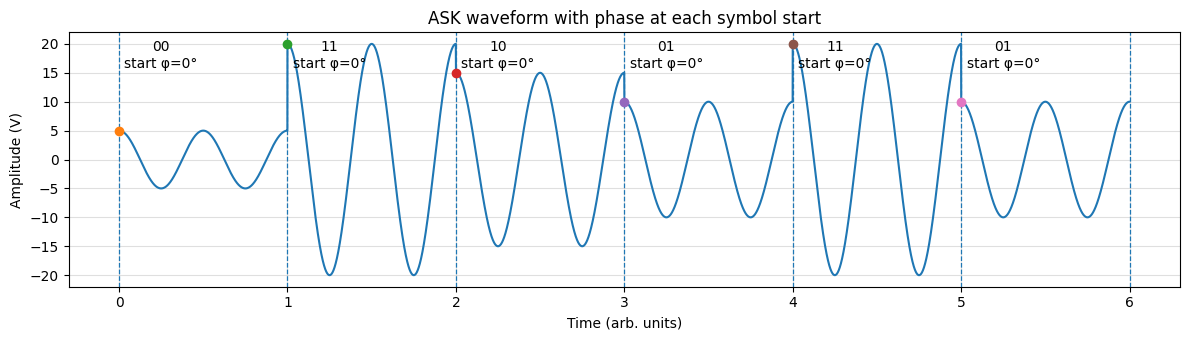

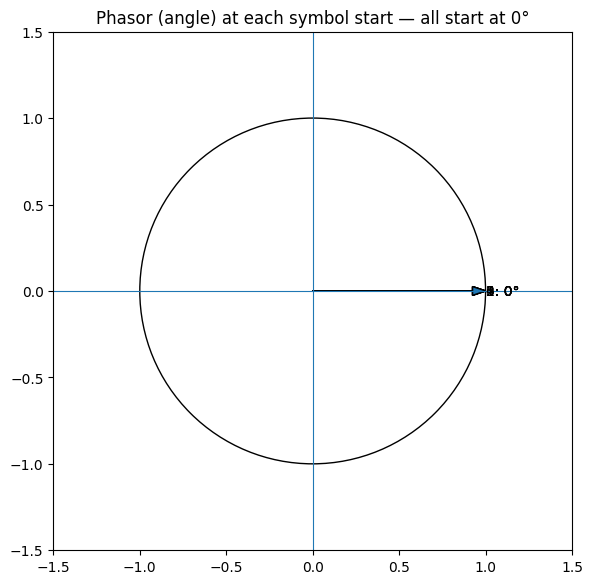

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# Plotting ASK waveform and showing the phase at the start of each symbol.
import numpy as np
import matplotlib.pyplot as plt

bits = "001110011101"
symbols = [bits[i:i+2] for i in range(0, len(bits), 2)]
amp_map = {"00":5, "01":10, "10":15, "11":20}

T = 1.0
f = 2.0 / T  # 2 cycles per baud
phi0 = 0.0  # radians

fs = 2000
num_symbols = len(symbols)
t = np.linspace(0, num_symbols*T, int(num_symbols*T*fs), endpoint=False)
signal = np.zeros_like(t)
starts = []

for k, sym in enumerate(symbols):
    A = amp_map[sym]
    t0 = k*T
    t1 = (k+1)*T
    idx = (t >= t0) & (t < t1)
    signal[idx] = A * np.cos(2*np.pi*f*t[idx] + phi0)
    starts.append(t0)

# Compute phase at each symbol start (wrapped to degrees)
phases_rad = (2*np.pi*f*np.array(starts) + phi0) % (2*np.pi)
phases_deg = np.degrees(phases_rad)

# Plot waveform with symbol start markers and phase annotation
plt.figure(figsize=(12,3.5))
plt.plot(t, signal)
for k, t0 in enumerate(starts):
    plt.axvline(t0, linestyle='--', linewidth=0.9)
    plt.plot(t0, amp_map[symbols[k]]*np.cos(2*np.pi*f*t0 + phi0), marker='o')  # marker at start instant
    plt.text(t0 + 0.25*T, 18, f"{symbols[k]}\nstart φ={phases_deg[k]:.0f}°", ha='center', va='center')
plt.axvline(num_symbols*T, linestyle='--', linewidth=0.9)
plt.ylim(-22,22)
plt.title("ASK waveform with phase at each symbol start")
plt.xlabel("Time (arb. units)")
plt.ylabel("Amplitude (V)")
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# Phasor diagram: unit circle arrows showing phase at each start (all should be 0°)
angles = phases_rad  # radians
plt.figure(figsize=(6,6))
circle = plt.Circle((0,0), 1, fill=False, linewidth=1)
ax = plt.gca()
ax.add_patch(circle)
# draw axes
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
for k, ang in enumerate(angles):
    x = np.cos(ang)
    y = np.sin(ang)
    plt.arrow(0, 0, x, y, head_width=0.05, length_includes_head=True)
    plt.text(x*1.1, y*1.1, f"{k}: {int(np.degrees(ang))}°", ha='center', va='center')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title("Phasor (angle) at each symbol start — all start at 0°")
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Print numeric phases for clarity
phases_deg.tolist()


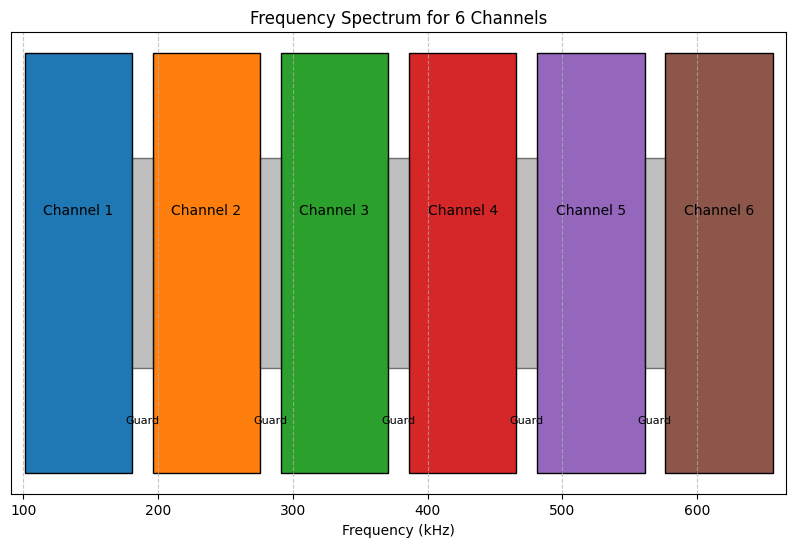

In [ ]:
import matplotlib.pyplot as plt

# Parameters
start_freq = 101  # Starting frequency in kHz
channels = 6
channel_bw = 80  # Bandwidth per channel in kHz
guard_bw = 15    # Guard band width in kHz
total_bw = 555   # Total bandwidth in kHz

# Frequency ranges for channels and guard bands
freq_ranges = []
current_freq = start_freq
for i in range(channels):
    freq_ranges.append((current_freq, current_freq + channel_bw))
    current_freq += channel_bw
    if i < channels - 1:  # Add guard band except after the last channel
        current_freq += guard_bw

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, (start, end) in enumerate(freq_ranges):
    ax.barh(1, end - start, left=start, height=0.8, color=colors[i % len(colors)], edgecolor='black')
    ax.text((start + end) / 2, 1.1, f'Channel {i+1}', ha='center', va='center', fontsize=10)

# Guard bands
guard_starts = [end for start, end in freq_ranges[:-1]]
guard_ends = [start + guard_bw for start in guard_starts]
for start, end in zip(guard_starts, guard_ends):
    ax.barh(1, end - start, left=start, height=0.4, color='gray', alpha=0.5, edgecolor='black')
    ax.text((start + end) / 2, 0.7, 'Guard', ha='center', va='center', fontsize=8)

# Labels and styling
ax.set_xlabel('Frequency (kHz)')
ax.set_yticks([])
ax.set_title('Frequency Spectrum for 6 Channels')
ax.set_xlim(start_freq - 10, start_freq + total_bw + 10)
ax.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

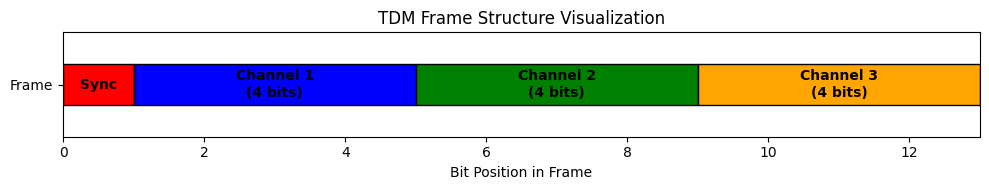

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the frame structure
channels = ['Sync', 'Channel 1\n(4 bits)', 'Channel 2\n(4 bits)', 'Channel 3\n(4 bits)']
frame_structure = [1, 4, 4, 4]  # 1 sync bit, then 4 bits from each channel
colors = ['red', 'blue', 'green', 'orange']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title("TDM Frame Structure Visualization")
ax.set_xlabel("Bit Position in Frame")
ax.set_yticks([0])
ax.set_yticklabels(["Frame"])

# Plot each slot in the frame
start = 0
for i, (channel, bits, color) in enumerate(zip(channels, frame_structure, colors)):
    end = start + bits
    ax.broken_barh([(start, bits)], (-0.4, 0.8), facecolors=color, edgecolors='black', linewidth=1)
    ax.text((start + end)/2, 0, channel, ha='center', va='center', fontweight='bold')
    start = end

# Formatting the plot
ax.set_xlim(0, sum(frame_structure))
ax.set_ylim(-1, 1)
ax.grid(False)
plt.tight_layout()
plt.show()

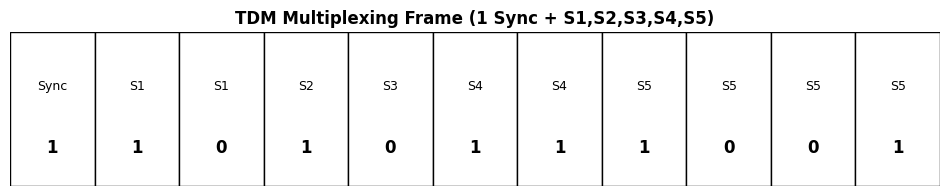

In [1]:
import matplotlib.pyplot as plt

# Frame parameters
slots = ["Sync", "S1", "S1", "S2", "S3", "S4", "S4", "S5", "S5", "S5", "S5"]
bits = [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]

# Plot
fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(0, len(slots))
ax.set_ylim(0, 1)
ax.axis("off")

# Draw slots
for i, (slot, bit) in enumerate(zip(slots, bits)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, edgecolor="black", facecolor="white"))
    ax.text(i + 0.5, 0.65, f"{slot}", ha="center", va="center", fontsize=9)
    ax.text(i + 0.5, 0.25, f"{bit}", ha="center", va="center", fontsize=12, fontweight="bold")

# Title
ax.set_title("TDM Multiplexing Frame (1 Sync + S1,S2,S3,S4,S5)", fontsize=12, weight="bold")

plt.show()
